In [1]:
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from scipy import stats
import plotly.express as px
import plotly.graph_objects as go

In [3]:
df = pd.read_csv("World GDP Dataset.csv",index_col=False)


In [4]:
print(df.shape)
print(df.columns)
df.head()

(230, 45)
Index(['GDP, current prices (Billions of U.S. dollars)', '1980', '1981',
       '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990',
       '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020', '2021', '2022', '2023'],
      dtype='object')


GDP, current prices (Billions of U.S. dollars)    1980    1981    1982  \
0                                    Afghanistan   0.000   0.000   0.000   
1                                        Albania   1.946   2.229   2.296   
2                                        Algeria  42.346  44.372  44.780   
3                                        Andorra   0.000   0.000   0.000   
4                                         Angola   6.639   6.214   6.214   

     1983    1984    1985    1986    1987    1988  ...     2014     2015  \
0   0.000   0.000   0.000   0.000   0.000   0.000  ...   20.616   20.057   
1   2.319   2.290   2.339   2.587   2.566   2.530  ...   13.246   11.389   
2  47.529  51.513  61.132  61.535  63.300  51.664  ...  213.810  165.979   
3   0.000   0.000   0.000   0.000   0.000   0.000  ...    3.267    2.789   
4   6.476   6.864   8.457   7.918   9.050   9.818  ...  145.712  116.194   

      2016     2017     2018     2019     2020     2021     2022     2023  
0   18.020   18.883   18.401   18.876   20.136    0.000    0.000    0.000  
1   11.862   13.053   15.157   15.399   15.161   18.310   18.256   18.842  
2  160.034  170.207  175.372  171.680  144.922  162.711  187.155  190.254  
3    2.895    2.993    3.217    3.155    2.885    3.330    3.302    3.360  
4  101.124  122.022  101.353   84.516   58.125   75.179  124.794  135.558  

[5 rows x 45 columns]

In [5]:
df.rename(columns = {'GDP, current prices (Billions of U.S. dollars)':'GDP'}, inplace = True)

In [6]:
print(df.shape)
print(df.duplicated().any())
df.info()

(230, 45)
True
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 45 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GDP     197 non-null    object 
 1   1980    196 non-null    float64
 2   1981    196 non-null    float64
 3   1982    196 non-null    float64
 4   1983    196 non-null    float64
 5   1984    196 non-null    float64
 6   1985    196 non-null    float64
 7   1986    196 non-null    float64
 8   1987    196 non-null    float64
 9   1988    196 non-null    float64
 10  1989    196 non-null    float64
 11  1990    196 non-null    float64
 12  1991    196 non-null    float64
 13  1992    196 non-null    float64
 14  1993    196 non-null    float64
 15  1994    196 non-null    float64
 16  1995    196 non-null    float64
 17  1996    196 non-null    float64
 18  1997    196 non-null    float64
 19  1998    196 non-null    float64
 20  1999    196 non-null    float64
 21  2000    196 non-null    

In [7]:
df = df.dropna()

In [8]:
df = df.replace([0.000000], min(filter(lambda x: x > 0, df["1980"])))

In [9]:
df = df.transpose()
df.describe()

0        1        2       3       4      5          6       7    \
count   45.000       45       45  45.000  45.000  45.00         45  45.000   
unique  21.000       45       45  26.000  44.000  44.00         45  34.000   
top      0.032  Albania  Algeria   0.032   6.214   1.37  Argentina   0.032   
freq    25.000        1        1  20.000   2.000   2.00          1  12.000   

           8          9    ...            186      187     188     189  \
count   45.000         45  ...             45       45  45.000  45.000   
unique  31.000         45  ...             45       45  34.000  43.000   
top      0.032  Australia  ...  United States  Uruguay   0.032   0.114   
freq    15.000          1  ...              1        1  12.000   2.000   

           190      191     192     193     194     195  
count   45.000       45  45.000  45.000      45  45.000  
unique  44.000       45  32.000  36.000      45  36.000  
top     59.865  Vietnam   0.032   0.032  Zambia   0.032  
freq     2.000        1  14.000  10.000       1  10.000  

[4 rows x 196 columns]

In [10]:
df2 = pd.DataFrame(df.values[1:], columns=df.iloc[0])
df2

GDP Afghanistan Albania  Algeria Andorra   Angola Antigua and Barbuda  \
0         0.032   1.946   42.346   0.032    6.639               0.131   
1         0.032   2.229   44.372   0.032    6.214               0.148   
2         0.032   2.296    44.78   0.032    6.214               0.164   
3         0.032   2.319   47.529   0.032    6.476               0.182   
4         0.032    2.29   51.513   0.032    6.864               0.208   
5         0.032   2.339   61.132   0.032    8.457               0.241   
6         0.032   2.587   61.535   0.032    7.918                0.29   
7         0.032   2.566     63.3   0.032     9.05               0.337   
8         0.032    2.53   51.664   0.032    9.818               0.399   
9         0.032   2.779   52.558   0.032   11.421               0.439   
10        0.032   2.221   61.892   0.032   12.571               0.459   
11        0.032   1.333    46.67   0.032   12.186               0.482   
12        0.032   0.843   49.217   0.032    9.395               0.499   
13        0.032   1.461   50.963   0.032    6.819               0.535   
14        0.032   2.361   42.426   0.032    4.965               0.589   
15        0.032   2.882   42.066   0.032    6.197               0.577   
16        0.032     3.2   46.941   0.032    7.994               0.634   
17        0.032   2.259   48.178   0.032    9.388               0.681   
18        0.032    2.56   48.188   0.032    7.958               0.728   
19        0.032   3.209   48.845   0.032    7.526               0.766   
20        0.032   3.483   54.749   1.429   11.166               0.826   
21        0.032   3.928   54.745   1.547    10.93                 0.8   
22        4.367   4.348   56.761   1.758   15.286               0.814   
23        4.553   5.611   67.864   2.362   17.813               0.856   
24        5.146   7.185   85.332   2.896   23.552                0.92   
25        6.167   8.052  103.198   3.158   36.971               1.023   
26        6.925   8.896  117.027   3.456   52.381               1.158   
27        8.556  10.677  134.977   3.952   65.266               1.313   
28       10.297  12.881  171.001   4.082   88.539                1.37   
29       12.066  12.044  137.211   3.675   70.307               1.228   
30       15.325  11.937  161.207   3.446   83.799               1.149   
31        17.89  12.899   200.02   3.625   111.79               1.138   
32       20.293  12.324  209.059   3.189  128.053                 1.2   
33        20.17  12.784  209.755   3.193   136.71               1.181   
34       20.616  13.246   213.81   3.267  145.712                1.25   
35       20.057  11.389  165.979   2.789  116.194               1.337   
36        18.02  11.862  160.034   2.895  101.124               1.437   
37       18.883  13.053  170.207   2.993  122.022               1.468   
38       18.401  15.157  175.372   3.217  101.353               1.606   
39       18.876  15.399   171.68   3.155   84.516               1.688   
40       20.136  15.161  144.922   2.885   58.125                1.37   
41        0.032   18.31  162.711    3.33   75.179               1.471   
42        0.032  18.256  187.155   3.302  124.794               1.692   
43        0.032  18.842  190.254    3.36  135.558               1.867   

GDP Argentina Armenia  Aruba Australia  ... United States Uruguay Uzbekistan  \
0     233.696   0.032  0.032   162.821  ...      2857.325  12.165      0.032   
1     189.802   0.032  0.032    188.29  ...      3207.025  13.578      0.032   
2       94.25   0.032  0.032    186.93  ...        3343.8    11.1      0.032   
3     116.267   0.032  0.032   179.364  ...      3634.025   6.093      0.032   
4     130.544   0.032  0.032   197.011  ...       4037.65   5.794      0.032   
5      98.599   0.032  0.032   174.274  ...        4339.0   5.662      0.032   
6     118.565   0.032  0.032   181.362  ...      4579.625   7.029      0.032   
7     121.561   0.032  0.032   212.964  ...       4855.25   8.794      0.0

In [11]:
list(df2)

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas, The',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 "China, People's Republic of",
 'Colombia',
 'Comoros',
 'Congo, Dem. Rep. of the',
 'Congo, Republic of ',
 'Costa Rica',
 'Croatia',
 'Cyprus',
 'Czech Republic',
 "Côte d'Ivoire",
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia, The',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 

[Text(0.5, 1.0, 'Eastern Europe GDP')]

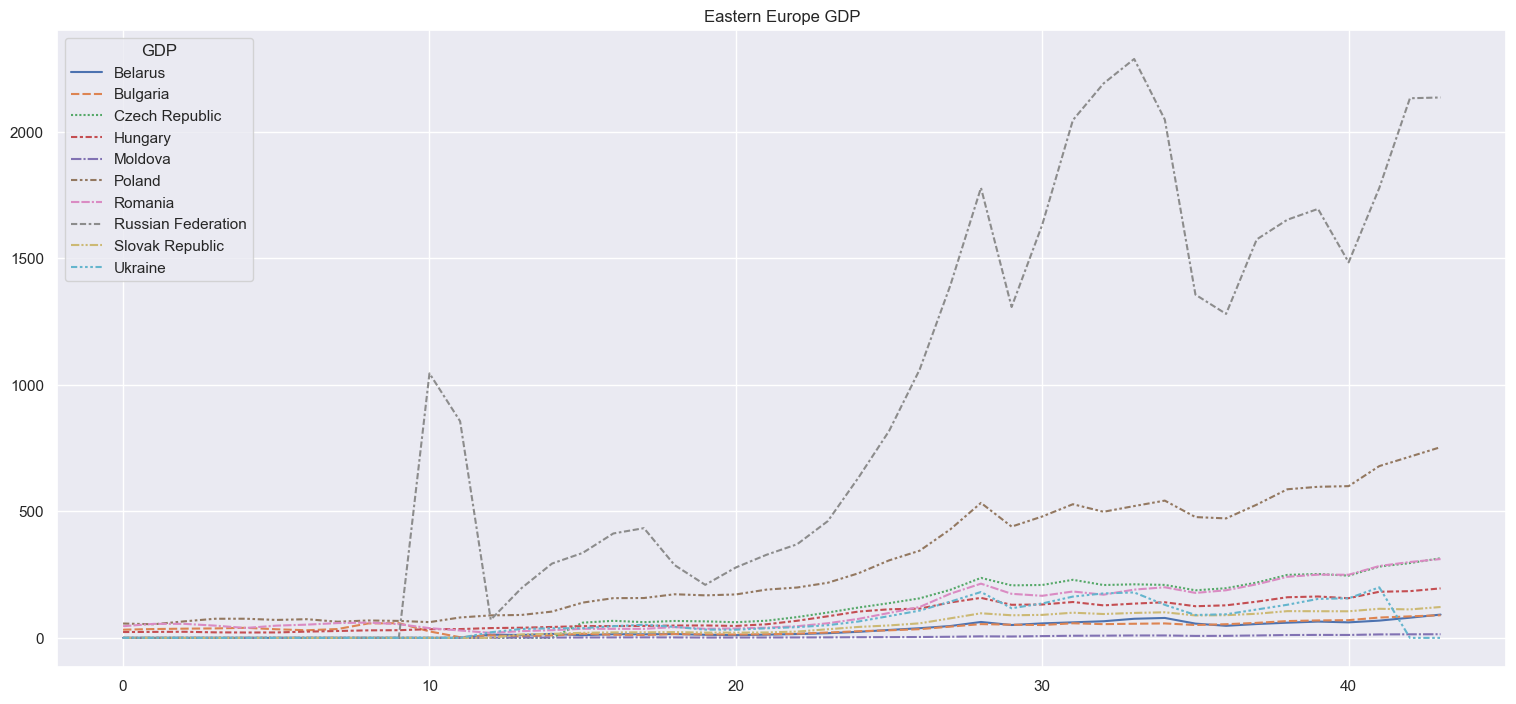

In [12]:
easternEurope = ["Belarus","Bulgaria","Czech Republic","Hungary","Moldova","Poland","Romania","Russian Federation","Slovak Republic","Ukraine"]

sns.set(rc={'figure.figsize':(18.7,8.27)})
sns.lineplot(data = df2.loc[:,easternEurope]).set(title='Eastern Europe GDP')

[Text(0.5, 1.0, 'Western Europe GDP')]

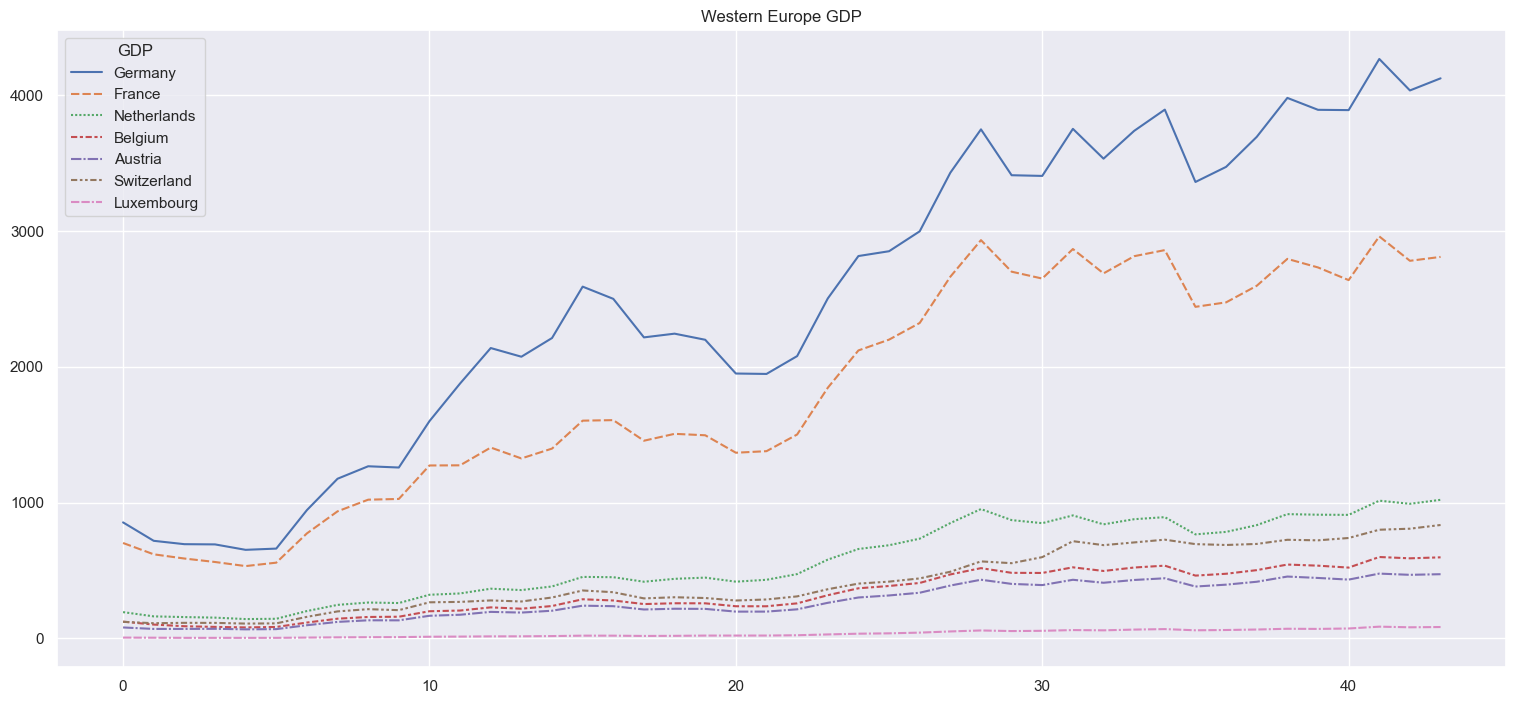

In [13]:
westernEurope = ["Germany","France","Netherlands","Belgium","Austria","Switzerland","Luxembourg"]

sns.set(rc={'figure.figsize':(18.7,8.27)})
sns.lineplot(data = df2.loc[:,westernEurope]).set(title='Western Europe GDP')

[Text(0.5, 1.0, 'Northern Europe GDP')]

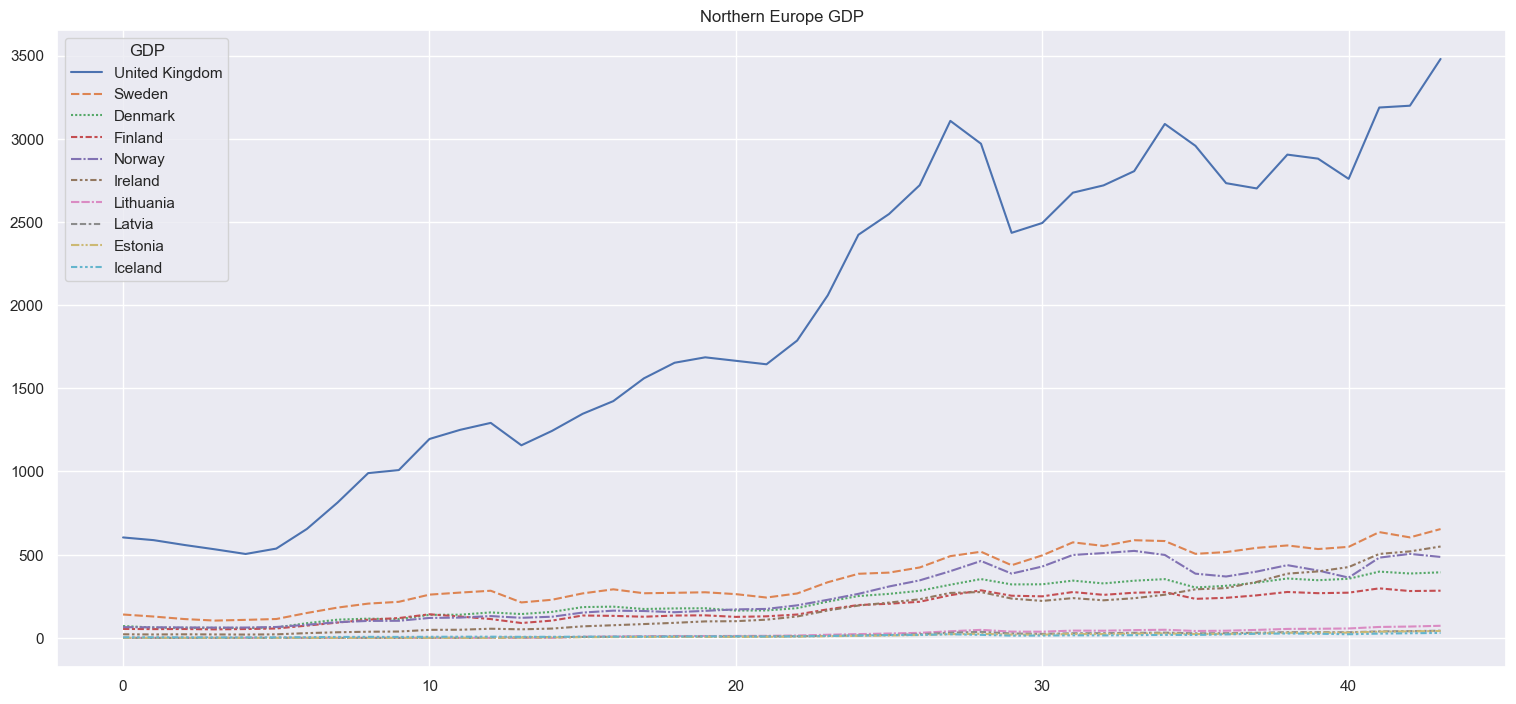

In [14]:
northernEurope = ["United Kingdom","Sweden","Denmark","Finland","Norway","Ireland","Lithuania","Latvia","Estonia","Iceland"]

sns.set(rc={'figure.figsize':(18.7,8.27)})
sns.lineplot(data = df2.loc[:,northernEurope]).set(title='Northern Europe GDP')

[Text(0.5, 1.0, 'Southern Europe GDP')]

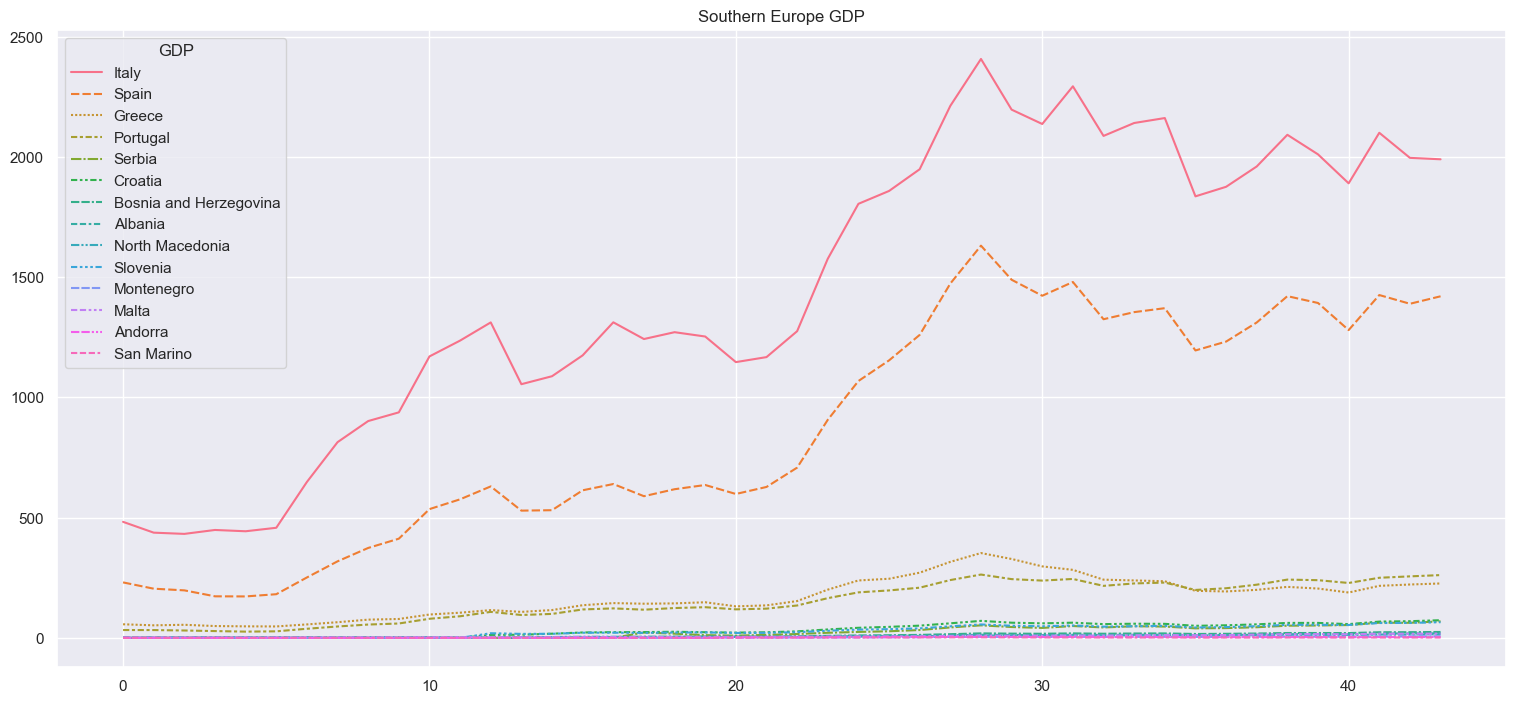

In [15]:
southernEurope = ["Italy","Spain","Greece","Portugal","Serbia","Croatia","Bosnia and Herzegovina","Albania","North Macedonia ","Slovenia","Montenegro","Malta","Andorra","San Marino"]

sns.set(rc={'figure.figsize':(18.7,8.27)})
sns.lineplot(data = df2.loc[:,southernEurope]).set(title='Southern Europe GDP')

[Text(0.5, 1.0, 'Top GDP in Europe')]

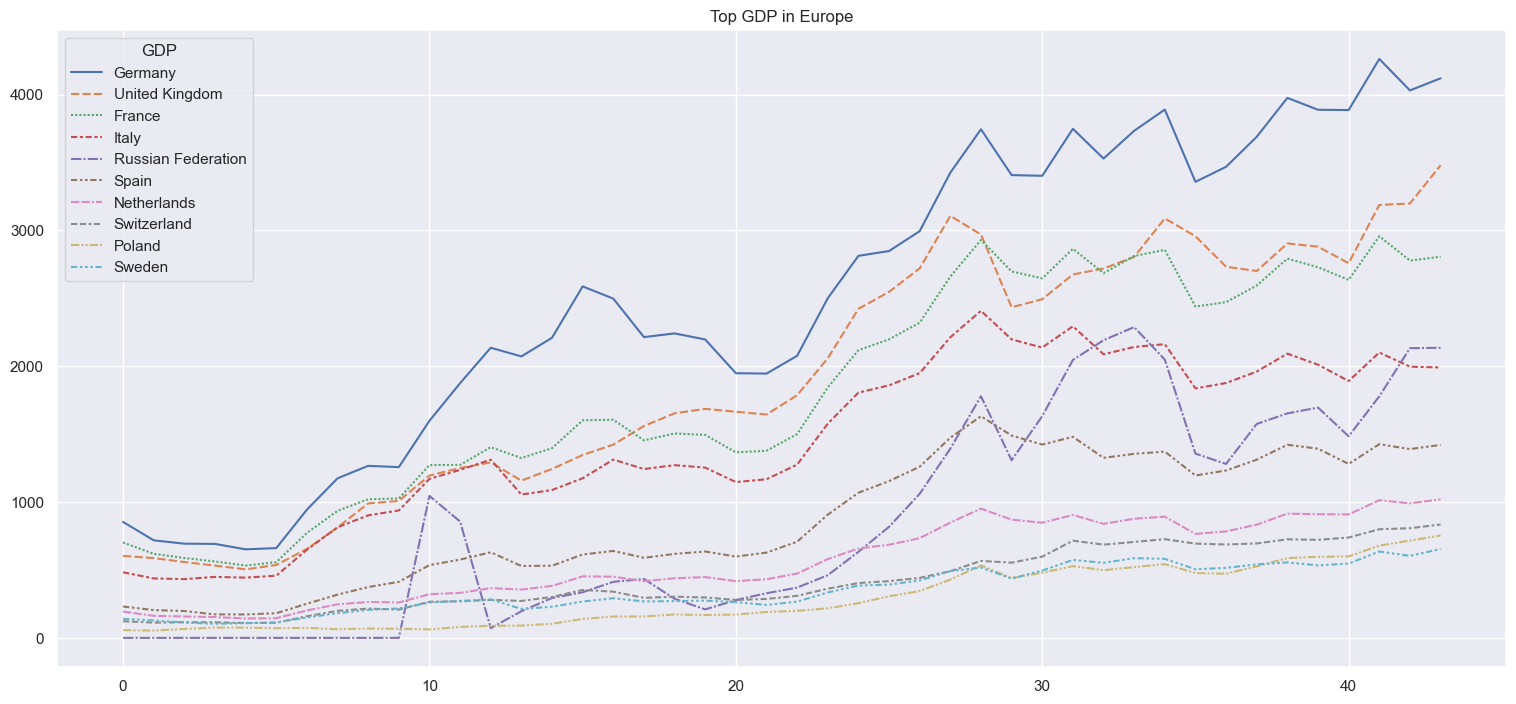

In [16]:
topEuropeTenGdp = ["Germany","United Kingdom","France","Italy","Russian Federation","Spain","Netherlands","Switzerland","Poland","Sweden"]

sns.set(rc={'figure.figsize':(18.7,8.27)})
sns.lineplot(data = df2.loc[:,topEuropeTenGdp]).set(title='Top GDP in Europe')

[Text(0.5, 1.0, 'Top GDP in the World')]

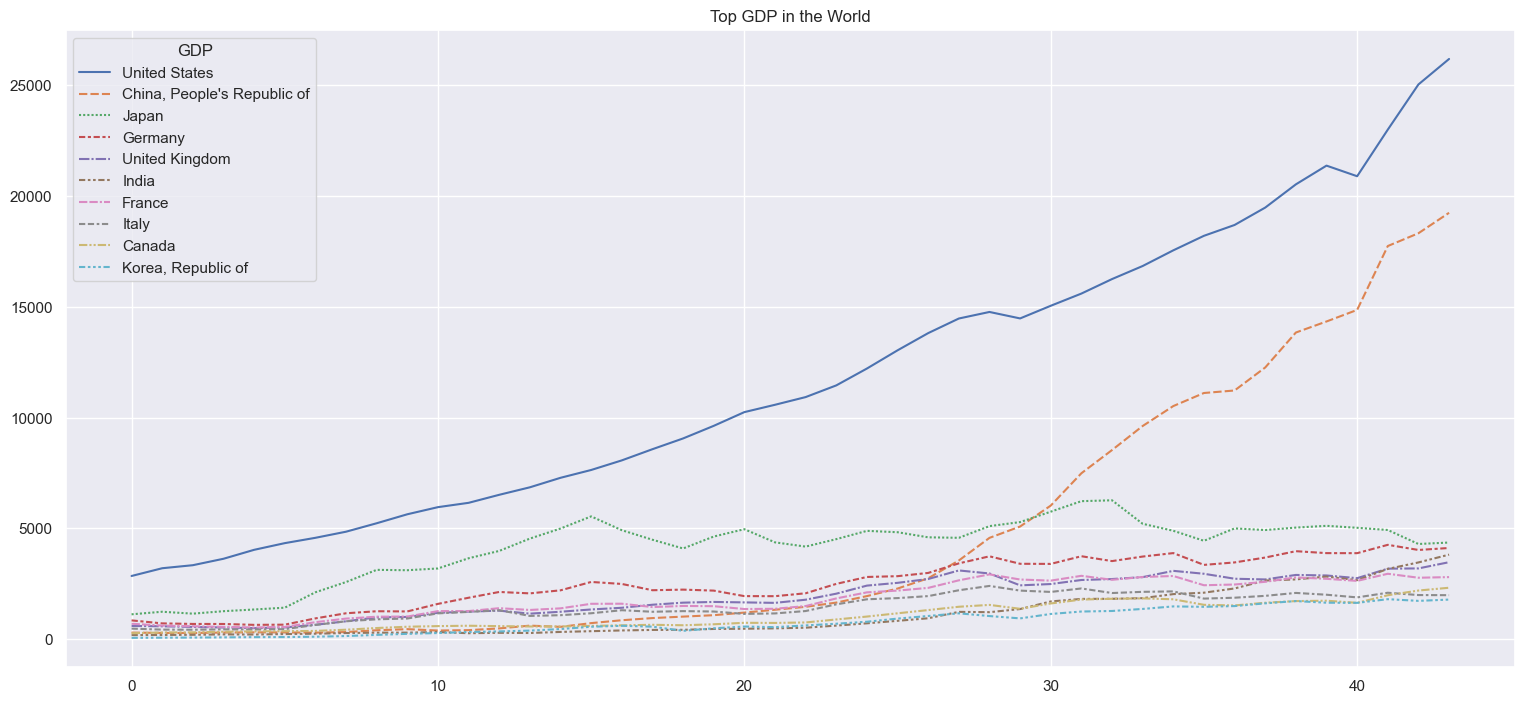

In [17]:
topTenGdp = ["United States","China, People's Republic of","Japan","Germany","United Kingdom","India","France","Italy","Canada","Korea, Republic of"]

sns.set(rc={'figure.figsize':(18.7,8.27)})
sns.lineplot(data = df2.loc[:,topTenGdp]).set(title='Top GDP in the World')

In [18]:
df = df.transpose()

In [19]:
df.set_index('GDP', inplace=True, drop=True)
df

1980    1981    1982    1983    1984    1985    1986  \
GDP                                                                          
Afghanistan          0.032   0.032   0.032   0.032   0.032   0.032   0.032   
Albania              1.946   2.229   2.296   2.319    2.29   2.339   2.587   
Algeria             42.346  44.372   44.78  47.529  51.513  61.132  61.535   
Andorra              0.032   0.032   0.032   0.032   0.032   0.032   0.032   
Angola               6.639   6.214   6.214   6.476   6.864   8.457   7.918   
...                    ...     ...     ...     ...     ...     ...     ...   
Vietnam             35.357  17.617  23.369  35.204  61.171  19.045  43.009   
West Bank and Gaza   0.032   0.032   0.032   0.032   0.032   0.032   0.032   
Yemen                0.032   0.032   0.032   0.032   0.032   0.032   0.032   
Zambia               4.246   4.385   4.232   3.653   3.003   2.848   1.962   
Zimbabwe             0.032   0.032   0.032   0.032   0.032   0.032   0.032   

                      1987    1988    1989  ...     2014     2015     2016  \
GDP                                         ...                              
Afghanistan          0.032   0.032   0.032  ...   20.616   20.057    18.02   
Albania              2.566    2.53   2.779  ...   13.246   11.389   11.862   
Algeria               63.3  51.664  52.558  ...   213.81  165.979  160.034   
Andorra              0.032   0.032   0.032  ...    3.267    2.789    2.895   
Angola                9.05   9.818  11.421  ...  145.712  116.194  101.124   
...                    ...     ...     ...  ...      ...      ...      ...   
Vietnam             53.385  29.501   7.991  ...  232.888  236.795  252.146   
West Bank and Gaza   0.032   0.032   0.032  ...    13.99   13.972   15.405   
Yemen                0.032   0.032   0.032  ...   43.229   42.444   31.318   
Zambia               2.431   4.095   4.365  ...   27.145   21.245   20.965   
Zimbabwe             0.032   0.032   0.032  ...   19.499   19.969   20.555   

                       2017     2018     2019     2020     2021     2022  \
GDP                                                                        
Afghanistan          18.883   18.401   18.876   20.136    0.032    0.032   
Albania              13.053   15.157   15.399   15.161    18.31   18.256   
Algeria             170.207  175.372   171.68  144.922  162.711  187.155   
Andorra               2.993    3.217    3.155    2.885     3.33    3.302   
Angola              122.022  101.353   84.516   58.125   75.179  124.794   
...                     ...      ...      ...      ...      ...      ...   
Vietnam             277.071  303.091  327.873  342.941  366.201  413.808   
West Bank and Gaza   16.128   16.277   17.134   15.532   18.037   18.818   
Yemen                26.842   21.606   21.888    18.85   19.911   27.594   
Zambia               25.874   26.312   23.309   18.111   21.313   27.025   
Zimbabwe             21.385   36.945   22.995   23.181   32.868    38.28   

                       2023  
GDP                          
Afghanistan           0.032  
Albania              18.842  
Algeria             190.254  
Andorra                3.36  
Angola              135.558  
...                     ...  
Vietnam              469.62  
West Bank and Gaza   19.398  
Yemen                28.099  
Zambia               28.798  
Zimbabwe             37.303  

[196 rows x 44 columns]

In [20]:
df.describe()

1980     1981     1982     1983     1984     1985     1986  \
count   196.000  196.000  196.000  196.000  196.000  196.000  196.000   
unique  146.000  145.000  146.000  146.000  146.000  147.000  149.000   
top       0.032    0.032    0.032    0.032    0.032    0.032    0.032   
freq     51.000   50.000   50.000   50.000   50.000   50.000   48.000   

           1987     1988     1989  ...     2014     2015    2016     2017  \
count   196.000  196.000  196.000  ...  196.000  196.000  196.00  196.000   
unique  147.000  149.000  150.000  ...  196.000  195.000  196.00  196.000   
top       0.032    0.032    0.032  ...   20.616   11.389   18.02   18.883   
freq     48.000   48.000   47.000  ...    1.000    2.000    1.00    1.000   

           2018     2019     2020     2021     2022     2023  
count   196.000  196.000  196.000  196.000  196.000  196.000  
unique  196.000  196.000  196.000  193.000  193.000  191.000  
top      18.401   18.876   20.136    0.032    0.032    0.032  
freq      1.000    1.000    1.000    3.000    4.000    6.000  

[4 rows x 44 columns]

In [21]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,:-1]
y = df.iloc[:,-1:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [22]:
X, y

(                      1980    1981    1982    1983    1984    1985    1986  \
 GDP                                                                          
 Afghanistan          0.032   0.032   0.032   0.032   0.032   0.032   0.032   
 Albania              1.946   2.229   2.296   2.319    2.29   2.339   2.587   
 Algeria             42.346  44.372   44.78  47.529  51.513  61.132  61.535   
 Andorra              0.032   0.032   0.032   0.032   0.032   0.032   0.032   
 Angola               6.639   6.214   6.214   6.476   6.864   8.457   7.918   
 ...                    ...     ...     ...     ...     ...     ...     ...   
 Vietnam             35.357  17.617  23.369  35.204  61.171  19.045  43.009   
 West Bank and Gaza   0.032   0.032   0.032   0.032   0.032   0.032   0.032   
 Yemen                0.032   0.032   0.032   0.032   0.032   0.032   0.032   
 Zambia               4.246   4.385   4.232   3.653   3.003   2.848   1.962   
 Zimbabwe             0.032   0.032   0.032   0.032 

In [23]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print(regressor.intercept_)

[-0.69213588]


In [24]:
print(regressor.coef_)

[[ 3.27584023e+00 -8.64660612e-01 -8.84948202e+00  1.46914781e+01
  -6.61000538e+00 -1.63677959e+00 -2.37972977e+00  2.13040845e+00
   6.39575845e-03 -9.34443079e-02  7.80893963e-01 -1.58552630e+00
   1.54013242e+00 -1.31879015e+00 -1.21708181e-01  2.40685232e-01
  -1.60912471e+00  7.20109553e-01 -1.22730206e-01  3.23251219e-02
  -3.48166848e-01  8.45704451e-01  1.06240642e+00  3.35416854e+00
  -4.81820443e+00  5.37927284e+00 -4.69833424e+00  1.22934474e+00
   1.19564246e+00 -3.11120809e+00  1.49427822e+00 -3.89994478e-01
  -5.54237624e-01  8.17469468e-01  6.93941744e-01 -4.51661357e-01
  -5.18566966e-02  2.21855031e-02 -2.90635598e+00  2.58936710e+00
   1.03223391e+00 -4.58941208e-01  7.16649205e-01]]


In [25]:
y_pred = regressor.predict(X_test)
df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})

In [26]:
print(df_preds)

                             Actual   Predicted
GDP                                            
Portugal                    261.173  252.429137
Micronesia, Fed. States of    0.453   -0.008942
Belarus                      91.985  118.695793
Hungary                     195.631  213.872018
Sierra Leone                  3.999   -0.877256
...                             ...         ...
Sweden                      653.962  623.302599
Comoros                        1.29    0.804512
Cameroon                     46.017   23.511519
Lebanon                       0.032   11.618488
Solomon Islands               1.702    0.789888

[65 rows x 2 columns]


# Gross Domestic Product (GDP) 

## Introduction

Gross Domestic Product (GDP) is a measure of the economic activity of a country. It is the total value of all goods and services produced within a country over a specific period of time, typically a year. GDP is often used as an indicator of the economic health and growth of a country.

A higher GDP generally indicates a higher level of economic activity and a stronger economy. It means that more goods and services are being produced and consumed, which can lead to more jobs and higher incomes for people living in the country. A higher GDP also typically means that the government has more resources to invest in social programs, infrastructure, and other public goods.

However, a higher GDP does not necessarily mean that the overall well-being of the population is better. GDP is only one indicator of a country's economic and social progress, and it does not take into account factors such as income inequality, environmental sustainability, or social well-being.

Additionally, a higher GDP may not be the best indicator of the well-being of the citizens, as it doesn't consider the distribution of wealth, income or access to opportunities. A country could have a high GDP but also high levels of poverty, inequality and social unrest.

For these reasons, it's important to use GDP in conjunction with other indicators, such as the Human Development Index (HDI), the Gini coefficient (next project), or the Multidimensional Poverty Index (MPI), to get a more complete picture of a country's economic and social progress.


In [27]:
df = pd.read_csv('World GDP Dataset.csv',index_col='GDP, current prices (Billions of U.S. dollars)')

In [28]:
#Read the dataset
df2 = pd.read_csv('final.csv')
df = df.rename_axis('Country')


In [29]:
print(df.head())
print(df2.head())

               1980    1981    1982    1983    1984    1985    1986    1987  \
Country                                                                       
Afghanistan   0.000   0.000   0.000   0.000   0.000   0.000   0.000   0.000   
Albania       1.946   2.229   2.296   2.319   2.290   2.339   2.587   2.566   
Algeria      42.346  44.372  44.780  47.529  51.513  61.132  61.535  63.300   
Andorra       0.000   0.000   0.000   0.000   0.000   0.000   0.000   0.000   
Angola        6.639   6.214   6.214   6.476   6.864   8.457   7.918   9.050   

               1988    1989  ...     2014     2015     2016     2017     2018  \
Country                      ...                                                
Afghanistan   0.000   0.000  ...   20.616   20.057   18.020   18.883   18.401   
Albania       2.530   2.779  ...   13.246   11.389   11.862   13.053   15.157   
Algeria      51.664  52.558  ...  213.810  165.979  160.034  170.207  175.372   
Andorra       0.000   0.000  ...    3.267

In [30]:
# Selecting south american countries
south_america = ['Chile','Brazil','Argentina','Peru','Bolivia','Uruguay','Paraguay','Ecuador','Colombia','Venezuela']
south_america_gdp = df.loc[df.index.isin(south_america)]

south_america_gdp

1980     1981     1982     1983     1984     1985     1986  \
Country                                                                    
Argentina  233.696  189.802   94.250  116.267  130.544   98.599  118.565   
Bolivia      3.589    3.440    3.813    3.609    3.752    4.059    3.970   
Brazil     145.819  167.583  179.166  143.652  142.957  226.938  263.256   
Chile       29.025   34.366   25.624   20.814   20.241   17.356   18.657   
Colombia    46.482   50.640   54.230   53.898   53.235   48.561   48.628   
Ecuador     16.840   17.243   17.214   15.129   16.101   18.830   13.816   
Paraguay     4.095    5.220    5.470    6.069    4.931    4.214    5.032   
Peru        20.190   24.398   24.259   18.863   19.442   16.823   25.241   
Uruguay     12.165   13.578   11.100    6.093    5.794    5.662    7.029   
Venezuela   69.841   78.367   79.998   79.672   57.826   59.865   60.877   

              1987     1988     1989  ...      2014      2015      2016  \
Country                               ...                                 
Argentina  121.561  142.386   91.352  ...   563.614   642.464   556.774   
Bolivia      4.323    4.598    4.716  ...    33.237    33.241    34.189   
Brazil     286.539  320.105  439.434  ...  2456.054  1800.045  1796.622   
Chile       22.005   25.941   29.882  ...   259.398   242.508   249.209   
Colombia    50.619   54.570   55.026  ...   381.241   293.493   282.720   
Ecuador     12.910   12.277   12.049  ...   101.726    99.290    99.938   
Paraguay     4.216    5.584    4.046  ...    40.378    36.211    36.090   
Peru        41.681   32.978   40.699  ...   202.880   192.025   195.463   
Uruguay      8.794    9.098    9.589  ...    61.851    57.435    57.246   
Venezuela   46.854   60.378   44.672  ...   214.869   125.446   112.912   

               2017      2018      2019      2020      2021      2022  \
Country                                                                 
Argentina   643.861   524.431   451.815   389.064   486.702   630.698   
Bolivia      37.782    40.581    41.193    36.897    40.703    43.431   
Brazil     2063.519  1916.934  1873.286  1448.550  1608.080  1894.708   
Chile       276.182   295.145   278.347   252.346   316.770   310.866   
Colombia    311.890   334.124   323.055   270.415   314.409   342.919   
Ecuador     104.296   107.562   108.108    99.291   106.166   115.469   
Paraguay     38.997    40.225    37.907    35.432    38.820    41.855   
Peru        215.681   226.795   232.345   205.820   225.938   239.333   
Uruguay      64.385    64.296    61.017    53.698    59.294    71.161   
Venezuela   115.883   102.084    74.418    44.953    59.513    82.145   

               2023  
Country              
Argentina   643.797  
Bolivia      45.989  
Brazil     2059.443  
Chile       347.570  
Colombia    361.941  
Ecuador     120.292  
Paraguay     44.623  
Peru        253.757  
Uruguay      72.986  
Venezuela    86.704  

[10 rows x 44 columns]

## Which countries are above the continental average?

Now that we understand the importance of GDP as a measure of a country's economic performance, we will take a closer look at the GDP data of South American countries. We will begin by checking for any missing values in the data, as well as identifying any outliers that may skew our analysis. The following code will show the number of missing values in the data and display a box plot to visualize the distribution of GDP values for each country.

It is important to note that economic performance is not solely determined by GDP. Other factors such as population, purchasing power, and economic policies also play a significant role in a country's overall economic well-being. In order to fully understand the GDP data of these South American countries, it is crucial to consider the broader economic context of the region and the individual countries. For example, a country's GDP may be affected by events such as natural disasters, political instability, or changes in trade policies. 

By understanding the broader economic context and considering other factors, we can gain a more comprehensive understanding of a country's economic performance.

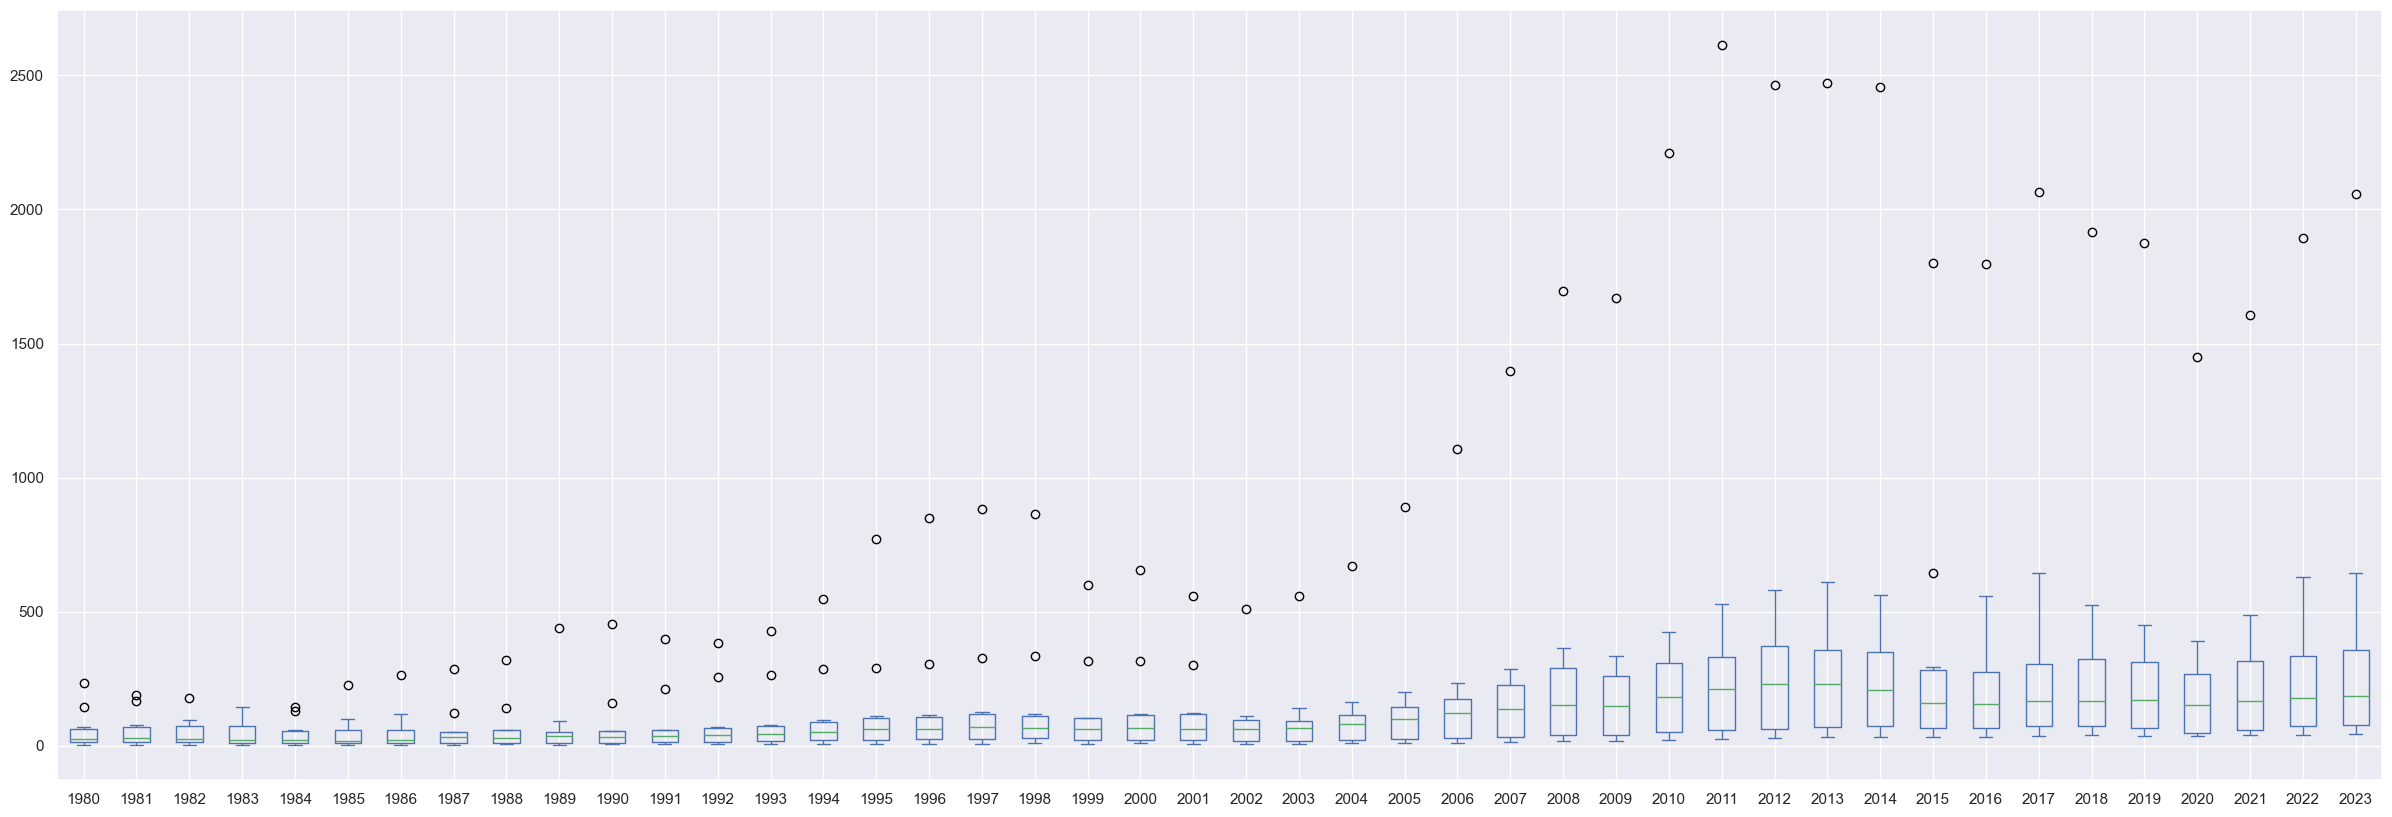

In [31]:
# Check NA's
south_america_gdp.isna().sum()

# Check for outliers
# Create a box plot of all the columns in the DataFrame
south_america_gdp.plot(kind='box', figsize=(30,10))
plt.show()

In [32]:
# Calculate the interquartile range (IQR)
q1 = south_america_gdp.quantile(0.25)
q3 = south_america_gdp.quantile(0.75)
iqr = q3 - q1

# Show how many times a country is classified as "outlier"
outliers = south_america_gdp.where((south_america_gdp < (q1 - 1.5 * iqr)) | (south_america_gdp > (q3 + 1.5 * iqr))).notnull()
outliers = outliers.groupby(outliers.index).sum()
outliers_total = outliers.sum(axis=1)
print(outliers_total)



Country
Argentina    18
Bolivia       0
Brazil       43
Chile         0
Colombia      0
Ecuador       0
Paraguay      0
Peru          0
Uruguay       0
Venezuela     0
dtype: int64


In [33]:
south_america_gdpp = df2.loc[df2.index.isin(south_america)]
#south_america_gdpp = df2.drop('region', axis=1, inplace=True)
south_america_gdpp

Empty DataFrame
Columns: [GDP, current prices (Billions of U.S. dollars), 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
Index: []

[0 rows x 45 columns]

# Analyzing Economic and Social Indicators in South American Countries

In this next section, we will take a closer look at the GDP of South American countries and how it compares to other economic and social indicators. First, we will start by visualizing the raw GDP data for the year 2022. This will give us a general understanding of the relative economic strength of each country. However, raw GDP data can be misleading as it does not take into account the population size of each country. Therefore, we will also adjust the GDP data to account for population size, to get a more accurate picture of the relative economic strength of each country.

In addition to GDP, we will also look at other indicators that can provide insight into the overall well-being of a country. We will look at the Health Index, which measures the overall health of a country's population, the IQ rate, which measures the average intelligence of a country's population, the GPI (Genuine Progress Indicator), which measures overall well-being and sustainable development, and finally, the IPC (Corruption Perception Index), which measures the level of perceived corruption in a country. By comparing the GDP data with these other indicators, we can get a more comprehensive understanding of the economic and social situation of each South American country.

In [34]:

colors_dict = {'Brazil': 'yellow', 'Argentina': 'blue', 'Chile': 'red', 'Peru': 'brown','Bolivia':'green','Colombia':'orange','Ecuador':'pink','Paraguay':'gray','Uruguay':'cyan','Venezuela':'purple'}
data = []

for country in south_america_gdp.index:
    trace = go.Scatter(x=south_america_gdp.columns, y=south_america_gdp.loc[country], name=country, line=dict(color=colors_dict.get(country, 'blue'), width=2))
    data.append(trace)

layout = go.Layout(title='GDP of South American Countries over time', xaxis=dict(title='Year'), yaxis=dict(title='GDP'))

fig = go.Figure(data=data, layout=layout)
fig.update_layout(width=700, height=600)
fig.show()

In [35]:
# Select data for the year 2022
south_america_gdp_2022 = south_america_gdp.loc[:, '2022']



# Calculate the total GDP of the continent for the year 2022
total_gdp_2022 = south_america_gdp_2022.sum()

# Divide the GDP of each country by the total GDP of the continent for the year 2022
gdp_percentage_2022 = (south_america_gdp_2022/total_gdp_2022)*100
gdp_percentage_2022 = gdp_percentage_2022.sort_values(ascending=False) 

colors = [colors_dict.get(c, 'blue') for c in gdp_percentage_2022.index]
# Create a bar chart
fig = go.Figure(data=[go.Bar(x=gdp_percentage_2022.values, y=gdp_percentage_2022.index,orientation='h', marker_color=colors)])
fig.update_layout(title_text='% of the continental GDP per country for the year 2022', xaxis_title='% of the continental GDP', yaxis_title='Country')
fig.update_layout(width=700, height=600)
fig.show()
